In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import IMNN

/Users/charnock/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
parameters = {
    'verbose': True,
    'number of simulations': 500,
    'number of parameters': 1,
    'differentiation fraction': .1,
    'number of summaries': 1,
    'prebuild': True,
    'input shape': [10, 20, 1],
    'wv': 0.,
    'bb': 0.1,
    'activation': tf.nn.leaky_relu,
    'α': 0.01,
    'hidden layers': [[10, [5, 5], [2, 2], 'SAME'], [6, [3, 3], [1, 1], 'SAME'], 100, 100],
}

parameters = {
    'verbose': True,
    'number of simulations': 500,
    'number of parameters': 1,
    'differentiation fraction': .1,
    'number of summaries': 1,
    'prebuild': False,
    'input shape': [10, 20, 1],
}

In [3]:
n = IMNN.IMNN(parameters = parameters)

network architecture is [[10, 20, 1], [10, [5, 5], [2, 2], 'SAME'], [6, [3, 3], [1, 1], 'SAME'], 100, 100, 1].


In [4]:
def generate_data(θ, train = False):
    if train:
        return np.moveaxis(np.random.normal(0., np.sqrt(θ), [1] + n.inputs + [len(θ)]), -1, 0)
    else:
        return np.moveaxis(np.random.normal(0., np.sqrt(θ), n.inputs + [len(θ)]), -1, 0)

In [5]:
n_train = 2

In [6]:
t = generate_data([1. for i in range(n_train * n.n_s)])
seed = np.random.randint(1e6)
np.random.seed(seed)
t_m = generate_data([0.9 for i in range(n_train * n.n_p)], train = True)
np.random.seed(seed)
t_p = generate_data([1.1 for i in range(n_train * n.n_p)], train = True)
np.random.seed()
derivative_denominator = 1. / 0.2
der_den = np.array([derivative_denominator])
train_data = [t, t_m, t_p]

In [7]:
tt = generate_data([1. for i in range(n.n_s)])
seed = np.random.randint(1e6)
np.random.seed(seed)
tt_m = generate_data([0.9 for i in range(n.n_p)], train = True)
np.random.seed(seed)
tt_p = generate_data([1.1 for i in range(n.n_p)], train = True)
np.random.seed()
test_data = [tt, tt_m, tt_p]

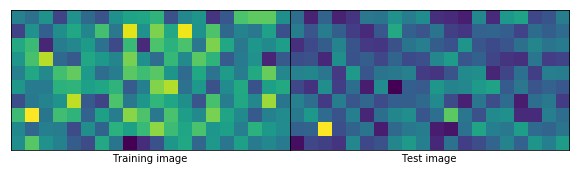

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
plt.subplots_adjust(wspace = 0)
ax[0].imshow(t[0, :, :, 0])
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('Training image')
ax[1].imshow(tt[0, :, :, 0])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlabel('Test image');

In [9]:
η = 1e-4
n.setup(η = η)

Tensor("Placeholder:0", shape=(?, 10, 20, 1), dtype=float32)
Tensor("IMNN/layer_1/conv_1/mul:0", shape=(?, 5, 10, 10), dtype=float32)
Tensor("IMNN/layer_2/conv_2/mul:0", shape=(?, 5, 10, 6), dtype=float32)
Tensor("IMNN/layer_3/dense_3/mul:0", shape=(?, 100), dtype=float32)
Tensor("IMNN/layer_4/dense_4/mul:0", shape=(?, 100), dtype=float32)
Tensor("IMNN/layer_5/LeakyRelu/Maximum:0", shape=(?, 1), dtype=float32)
Tensor("StopGradient:0", shape=(?, 10, 20, 1), dtype=float32)
Tensor("IMNN/layer_1_1/conv_1/mul:0", shape=(?, 5, 10, 10), dtype=float32)
Tensor("IMNN/layer_2_1/conv_2/mul:0", shape=(?, 5, 10, 6), dtype=float32)
Tensor("IMNN/layer_3_1/dense_3/mul:0", shape=(?, 100), dtype=float32)
Tensor("IMNN/layer_4_1/dense_4/mul:0", shape=(?, 100), dtype=float32)
Tensor("IMNN/layer_5_1/LeakyRelu/Maximum:0", shape=(?, 1), dtype=float32)
Tensor("StopGradient_1:0", shape=(?, 10, 20, 1), dtype=float32)
Tensor("IMNN/layer_1_2/conv_1/mul:0", shape=(?, 5, 10, 10), dtype=float32)
Tensor("IMNN/layer_2_2

def network(input_tensor, dropout):
    with tf.variable_scope('layer_1'):
        weights = tf.get_variable("weights", [5, 5, 1, 10], initializer = tf.random_normal_initializer(0., 1.))
        biases = tf.get_variable("biases", [10], initializer = tf.constant_initializer(0.1))
    x = tf.nn.conv2d(input_tensor, weights, [1, 2, 2, 1], padding = 'SAME')
    x = tf.add(x, biases)
    x = tf.nn.leaky_relu(x, 0.01)
    x = tf.nn.dropout(x, dropout)
    with tf.variable_scope('layer_2'):
        weights = tf.get_variable("weights", [5, 5, 10, 6], initializer = tf.random_normal_initializer(0., 1.))
        biases = tf.get_variable("biases", [6], initializer = tf.constant_initializer(0.1))
    x = tf.nn.conv2d(x, weights, [1, 1, 1, 1], padding = 'SAME')
    x = tf.add(x, biases)
    x = tf.nn.leaky_relu(x, 0.01)
    x = tf.nn.dropout(x, dropout)
    x = tf.reshape(x, (-1, 300))
    with tf.variable_scope('layer_3'):
        weights = tf.get_variable("weights", [300, 100], initializer = tf.random_normal_initializer(0., np.sqrt(2. / 300)))
        biases = tf.get_variable("biases", [100], initializer = tf.constant_initializer(0.1))
    x = tf.matmul(x, weights)
    x = tf.add(x, biases)
    x = tf.nn.leaky_relu(x, 0.01)
    x = tf.nn.dropout(x, dropout)
    with tf.variable_scope('layer_4'):
        weights = tf.get_variable("weights", [100, 100], initializer = tf.random_normal_initializer(0., np.sqrt(2. / 100)))
        biases = tf.get_variable("biases", [100], initializer = tf.constant_initializer(0.1))
    x = tf.matmul(x, weights)
    x = tf.add(x, biases)
    x = tf.nn.leaky_relu(x, 0.01)
    x = tf.nn.dropout(x, dropout)
    with tf.variable_scope('layer_5'):
        weights = tf.get_variable("weights", [100, 1], initializer = tf.random_normal_initializer(0., np.sqrt(2. / 100)))
        biases = tf.get_variable("biases", [1], initializer = tf.constant_initializer(0.1))
    x = tf.matmul(x, weights)
    x = tf.add(x, biases)
    x = tf.nn.leaky_relu(x, 0.01)
    return x

n.setup(network = network)

n.reinitialise_session()

n.training_scheme(η = η)

In [16]:
train_F, test_F = n.train(train_data = train_data, num_epochs = 100, n_train = n_train, num_batches = 1, keep_rate = 0.8, der_den = der_den, test_data = test_data)

100%|██████████| 100/100 [00:20<00:00,  4.81it/s]


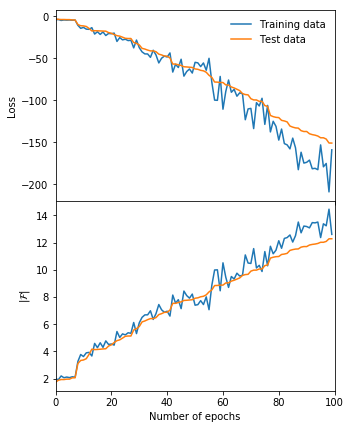

In [15]:
train_F = np.array(train_F)
test_F = np.array(test_F)
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (5, 7))
plt.subplots_adjust(hspace = 0)
end = len(train_F)
epochs = np.arange(end)
a, = ax[0].plot(epochs, -train_F[:end]**2, label = 'Training data')
b, = ax[0].plot(epochs, -test_F[:end]**2, label = 'Test data')
ax[0].legend(frameon = False)
ax[0].set_ylabel('Loss')
ax[1].plot(epochs, train_F[:end])
ax[1].plot(epochs, test_F[:end])
ax[1].set_ylabel('$|\mathcal{F}|$')
ax[1].set_xlabel('Number of epochs')
ax[1].set_xlim([0, len(epochs)]);

In [17]:
real_data = generate_data([1.])

In [18]:
prior = [0, 10]

θ_values = np.linspace(prior[0]+0.05, prior[1], 1000)
posterior = np.exp(-0.5 * 10 * 20 * np.log(2. * np.pi * θ_values) - 0.5 * np.sum(real_data**2.) / θ_values)
posterior /= np.sum(posterior * (θ_values[1] - θ_values[0]))

In [21]:
ttd = n.shuffle(test_data[0], test_data[1], test_data[2], 1)
tt, tt_m, tt_p = n.get_combination_data(ttd, 0, 1)
F = n.sess.run(n.F, feed_dict = {n.x: tt, n.x_m: tt_m, n.x_p: tt_p, n.dropout: 1., n.dd: der_den})

In [22]:
θ, summary, s, ρ = n.ABC(real_data, F, [0, 10], 100000, generate_data)

In [23]:
ϵ = 1
accept_indices = np.argwhere(ρ < ϵ)[:, 0]
reject_indices = np.argwhere(ρ >= ϵ)[:, 0]

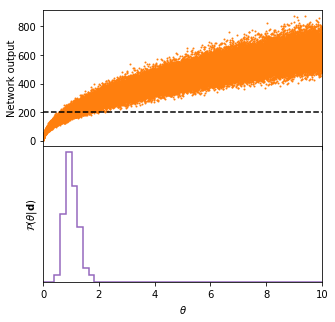

In [24]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (5, 5))
plt.subplots_adjust(hspace = 0)
ax[0].scatter(θ[accept_indices] , s[accept_indices, 0], s = 1)
ax[0].scatter(θ[reject_indices], s[reject_indices, 0], s = 1)
ax[0].plot([0, 10], [summary[0], summary[0]], color = 'black', linestyle = 'dashed')
ax[0].set_ylabel('Network output', labelpad = 0)
ax[0].set_xlim([0, 10])
ax[1].hist(θ[accept_indices], np.linspace(0, 10, 50), histtype = u'step', normed = True, linewidth = 1.5, color = '#9467bd');
#ax[1].plot(θ_values, posterior)
ax[1].set_xlabel('$\\theta$')
ax[1].set_ylabel('$\\mathcal{P}(\\theta|{\\bf d})$')
ax[1].set_yticks([]);

In [25]:
θ_, summary_, ρ_, s_, W, total_draws = n.PMC(real_data, F, [0, 10], 1000, 1000, generate_data, 0.1)

iteration = 1, current criterion = 3.0864197530864197, total draws = 1324, ϵ = 1678.6738891601562.
iteration = 2, current criterion = 2.1881838074398248, total draws = 1781, ϵ = 1310.0952758789062.
iteration = 3, current criterion = 1.51285930408472, total draws = 2442, ϵ = 1028.2496032714844.
iteration = 4, current criterion = 1.0351966873706004, total draws = 3408, ϵ = 814.7404479980469.
iteration = 5, current criterion = 1.1806375442739079, total draws = 4255, ϵ = 651.197021484375.
iteration = 6, current criterion = 0.6234413965087282, total draws = 5859, ϵ = 516.2974700927734.
iteration = 7, current criterion = 1.0309278350515463, total draws = 6829, ϵ = 432.46021270751953.
iteration = 8, current criterion = 0.49652432969215493, total draws = 8843, ϵ = 346.14827728271484.
iteration = 9, current criterion = 0.339097999321804, total draws = 11792, ϵ = 283.1241760253906.
iteration = 10, current criterion = 0.17179178835251674, total draws = 17613, ϵ = 229.13341903686523.
iteration = 1

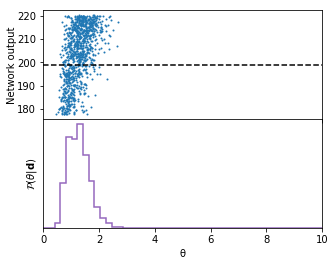

In [26]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (5, 4))
plt.subplots_adjust(hspace = 0)
ax[0].scatter(θ_ , s_, s = 1)
ax[0].plot([0, 10], [summary[0], summary[0]], color = 'black', linestyle = 'dashed')
ax[0].set_ylabel('Network output', labelpad = 0)
ax[0].set_xlim([0, 10])
ax[1].hist(θ_, np.linspace(0, 10, 50), histtype = u'step', normed = True, linewidth = 1.5, color = '#9467bd');
#ax[1].plot(θ_values, posterior)
ax[1].set_xlabel('θ')
ax[1].set_ylabel('$\\mathcal{P}(\\theta|{\\bf d})$')
ax[1].set_yticks([]);